In [2]:
import pandas as pd # installing Pandas library
import numpy as np # installing numPy library
import matplotlib as plt # installing matplotlib library for visualization
%matplotlib inline
df = pd.read_csv('loanP_train.csv') # reading in the csv dataset into the DataFrame using Pandas library

In [3]:
df.head() # look at the first five rows of the dataframe by using the head() function

,Loan_ID,Gender,Marital_Status,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LI0100,Male,Single,0,Yes,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LI0101,Male,Married,1,Yes,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LI0102,Male,Married,0,Yes,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LI0103,Male,Married,0,No,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LI0104,Male,Single,0,Yes,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.describe() # look at a summary of all the numerical columns in our dataframe

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,599.000000,578.000000,585.000000,550.00000
mean,5420.687813,1563.913055,145.434256,342.461538,0.84000
std,6169.168633,2456.618360,84.596463,64.868352,0.36694
min,150.000000,0.000000,9.000000,12.000000,0.00000
25%,2874.000000,0.000000,100.000000,360.000000,1.00000
50%,3812.000000,1210.000000,126.500000,360.000000,1.00000
75%,5807.500000,2279.000000,165.000000,360.000000,1.00000
max,81000.000000,33837.000000,700.000000,480.000000,1.00000


In [5]:
#df['Property_Area'].value_counts() # we can look at a frequency distribution to understand whether the selected data make sense or not

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Graduate'>

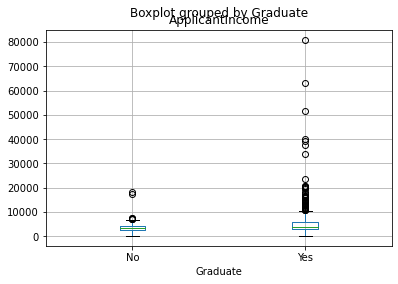

In [6]:
df.boxplot(column='ApplicantIncome', by ='Graduate') # visualize the data to understand the distribution

<AxesSubplot:>

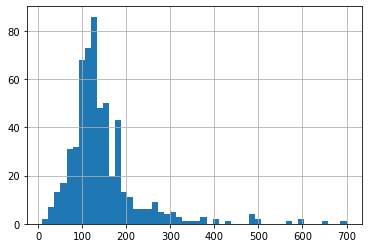

In [8]:
df['LoanAmount'].hist(bins=50) # using a histogram to visualize the LoanAmount data, there are some outlier values in the 400+ range and higher

<AxesSubplot:>

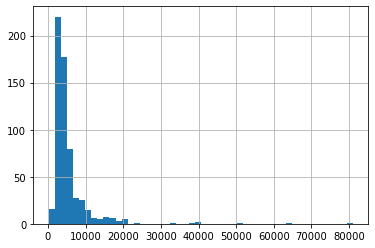

In [10]:
df['ApplicantIncome'].hist(bins=50) # using a histogram to visualize the ApplicantIncome data, there are some outlier values in the 25,000+ range and higher

In [15]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Credit History:')
print(temp1)

print ('\nProbability of getting loan for each Credit History class:')
print(temp2) # gathering the data for the visualization step and defining objects (temp1 and temp2)

Frequency Table for Credit History:
0.0     88
1.0    462
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.079545
1.0                0.792208


<AxesSubplot:title={'center':'Applicants by Credit_History'}, xlabel='Credit_History', ylabel='Count of Applicants'>

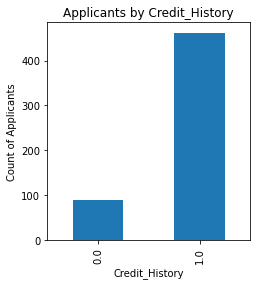

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar') # visualizing categorical values' distribution (Credit History and Count of Applicants) using matplotlib library

In [16]:
df.apply(lambda x: sum(x.isnull()),axis=0) # checking for the total (sum) number of missing/null values in each column

Loan_ID               0
Gender               13
Marital_Status        3
Dependents           15
Graduate              0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True) # filling in any of the missing/null values in the LoanAmount column with the mean value of the column

In [18]:
df.apply(lambda x: sum(x.isnull()),axis=0) # verifying that the missing/null values in the LoanAmount column have been filled

Loan_ID               0
Gender               13
Marital_Status        3
Dependents           15
Graduate              0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True) # filling in any of the missing/null values in the Loan_Amount_Term column with the mean value of the column
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True) # filling in any of the missing/null values in the Credit_History column with the mean value of the column

In [20]:
df.mean() # performing basic math operations on the dataframe, will give us the mean of all the numerical values in each column

C:\Users\walle\AppData\Local\Temp\ipykernel_7584\326789144.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean() # performing basic math operations on the dataframe


ApplicantIncome      5420.687813
CoapplicantIncome    1563.913055
LoanAmount            145.434256
Loan_Amount_Term      342.461538
Credit_History          0.840000
dtype: float64

In [21]:
df.dtypes # call for the data types of the dataframe

Loan_ID               object
Gender                object
Marital_Status        object
Dependents            object
Graduate              object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [22]:
# Importing libraries from sci-kit learn module to build a predictive model in Python
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [23]:
# Extracting only the independent variables for machine learning
X = df.iloc[:, [8,10]].values # credit history and loan amount

# Extracting only the dependent variables for machine learning
y = df.iloc[:, 12].values # loan status

In [24]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) # setting the test size split (75% training set,25% test set) and entering the independent and dependent variables defined in the previous step 

In [25]:
# Feature scaling, normalizing the data from those outlier data points
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [26]:
# Fitting logistics regression to training dataset, creating the instance (classifier) of logistic regression object
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0) # we can create any object name, we have chosen 'classifier'
classifier.fit(X_train, y_train) # calling the fit() method to training this model

LogisticRegression(random_state=0)

In [27]:
# Predicting the test set results, testing our data
y_pred = classifier.predict(X_test) # calling the predict() method to predict the y values (dependent variables) by passing through the X values (independent variables)
y_pred

array(['Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [28]:
# building the Confusion Matrix, calculating how accurate our model predicted the values
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred) # the array will tell us how many are correctly predicted and how many of them incorrectly predicted 
cm

array([[ 18,  27],
       [  2, 103]], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score # accuracy calculation by passing through the test and predicted values of the y values
accuracy_score(y_test, y_pred)

0.8066666666666666

In [30]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]}) # creating dataframes that do not have an identical structure
left

,key,lval
0,foo,1
1,bar,2


In [32]:
right = pd.DataFrame({'key': ['foo', 'bar', 'bar'], 'rval': [3, 4, 5]}) # creating dataframes that do not have an identical structure
right

,key,rval
0,foo,3
1,bar,4
2,bar,5


In [33]:
pd.merge(left, right, on='key') # creating a merged dataframe using the merge() function based on the key

,key,lval,rval
0,foo,1,3
1,bar,2,4
2,bar,2,5


In [34]:
one = pd.DataFrame(np.random.randn(5, 4)) # creates an array of specified shape and fills it with random values using numpy
one

,0,1,2,3
0,-1.042011,-0.076014,1.537789,-1.160480
1,-0.252256,0.861311,0.504652,-0.426752
2,-2.385728,-1.270805,0.026204,-1.519776
3,-0.624857,-0.206121,-2.658572,-0.098811
4,0.217245,-0.298739,0.295179,0.769193


In [35]:
two = pd.DataFrame(np.random.randn(5, 4)) # creates an array of specified shape and fills it with random values using numpy
two

,0,1,2,3
0,-0.604273,0.178849,0.314040,0.331067
1,1.639146,-0.378021,1.487259,-2.148706
2,1.061872,-0.109762,0.451713,0.811986
3,-1.404887,1.222862,-0.626331,-1.391062
4,0.366206,-0.200450,-1.498294,0.740670


In [36]:
# combining dataframe objects using simple concatenation (provided they have the same columns)
pd.concat([one, two]) # concatenating the dataframes labelled 'one' and 'two'

,0,1,2,3
0,-1.042011,-0.076014,1.537789,-1.160480
1,-0.252256,0.861311,0.504652,-0.426752
2,-2.385728,-1.270805,0.026204,-1.519776
3,-0.624857,-0.206121,-2.658572,-0.098811
4,0.217245,-0.298739,0.295179,0.769193
0,-0.604273,0.178849,0.314040,0.331067
1,1.639146,-0.378021,1.487259,-2.148706
2,1.061872,-0.109762,0.451713,0.811986
3,-1.404887,1.222862,-0.626331,-1.391062
4,0.366206,-0.200450,-1.498294,0.740670
